In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/dot'

In [56]:
# Inspired by the example in : https://www.youtube.com/watch?v=y5VdtQSqiAI

BALLS = 12
N = 50000

d = {
    "weighing" : [],
    "result" : []
}

# We will consider ball 1 to be the problematic one
for _ in range(N):
    for n_balls in [2, 3, 4, 5, 6]:
        d["weighing"].append(n_balls)
        is_heavier = random.choice(["L", "H"]) == "H"
        scale_side_1 = list(np.random.choice(list(range(1, 13)), n_balls, replace = False))
        scale_side_2 = list(np.random.choice([item for item in list(range(1, 13)) if item not in scale_side_1], n_balls, replace = False))
        if 1 in scale_side_1 and is_heavier:
            d["result"].append("Left_Heavier")
        elif 1 in scale_side_1 and not is_heavier:
            d["result"].append("Left_Lighter")
        elif 1 in scale_side_2 and is_heavier:
            d["result"].append("Left_Lighter")
        elif 1 in scale_side_2 and not is_heavier:
            d["result"].append("Left_Heavier")
        else:
            d["result"].append("Equilibrium")


In [57]:
df = pd.DataFrame(d)
print(f"The dataframe contains {len(df)} rows.")
df.head()

The dataframe contains 250000 rows.


,weighing,result
0,2,Equilibrium
1,3,Equilibrium
2,4,Equilibrium
3,5,Equilibrium
4,6,Left_Lighter


In [58]:
def calculate_entropy(df):
    entropy = 0
    for key, prob in (df.value_counts()/df.shape[0]).to_dict().items(): 
        entropy += (-prob * np.log2(prob).item())
    return entropy

In [59]:
for i in [2, 3, 4, 5, 6]:
    print(f"The entropy when the number of balls is {i} is {calculate_entropy(df.loc[df.weighing == i, :].result)}.")

The entropy when the number of balls is 2 is 1.2514790468657426.
The entropy when the number of balls is 3 is 1.500254599512829.
The entropy when the number of balls is 4 is 1.5849616520384058.
The entropy when the number of balls is 5 is 1.4834035498154.
The entropy when the number of balls is 6 is 0.9999994910171297.


In [62]:
df.loc[df.weighing == 4, :].result.value_counts()

Equilibrium     16692
Left_Lighter    16657
Left_Heavier    16651
Name: result, dtype: int64

In [19]:
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy")
decision_tree_classifier.fit(df.drop("result", inplace=False, axis = 1), df["result"])

DecisionTreeClassifier(criterion='entropy')

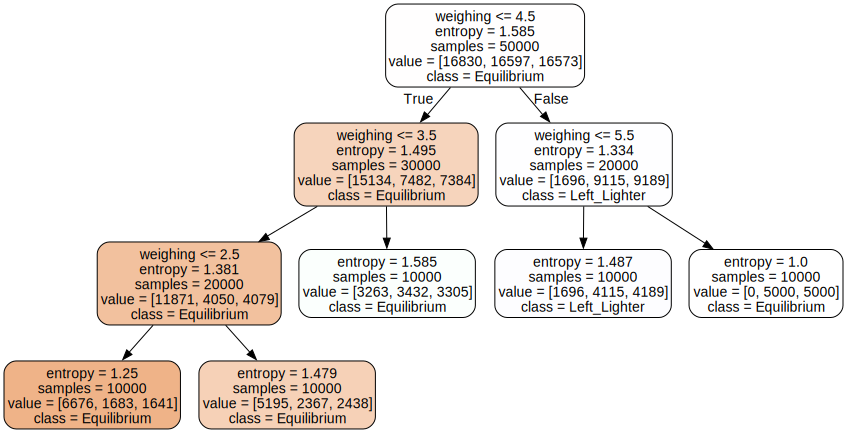

In [20]:
feature_names = ["weighing"]
dot_data = export_graphviz(decision_tree_classifier, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=df.result.values)
graph = graphviz.Source(dot_data)
graph